In [6]:
# Program 1

import csv
h=['0', '0', '0', '0', '0', '0']
with open('w-s.csv', 'r') as f:
    reader=csv.reader(f)
    next(reader)
    your_list=list(reader)

for i in your_list:
    if len(i)>0 and i[-1]=="true":
        for j in reader(len(i)-1):
            if i[j]!=h[j] and h[j]=='0':
                h[j]=i[j]
            elif i[j]!=h[j] and h[j]!='0':
                h[j]='?'

#Print the maximally specific hypothesis
print("Maximally specific hypothesis is:")
print(h)

Maximally specific hypothesis is:
['0', '0', '0', '0', '0', '0']


In [9]:
# Program 2

import numpy as np
import pandas as pd

#Define the path to your csv file
path='tennis.csv'

#Load the data
data=pd.read_csv(path)

#Separate the data into instances(concepts) and target values
concepts=np.array(data.iloc[:, 0:-1])
print("\nInstances are:\n", concepts)
target=np.array(data.iloc[:, -1])
print("\nTarget values are:", target)

#Function to learn the hypotheses
def learn(concepts, target):
    specific_h=concepts[0].copy()
    print("\nInitialization of specific_h and general_h")
    print("\nSpecific Boundary:", specific_h)
    general_h=[["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print("\nGeneric Boundary:", general_h)

    #Iterate through each instance and update hypotheses
    for i, h in enumerate(concepts):
        print("\nInstance", i+1, "is", h)
        if target[i]==True:
            print("Instance is Positive")
            for x in range(len(specific_h)):
                if h[x]!=specific_h[x]:
                    specific_h[x]='?'
                    general_h[x]='?'

        if target[i]==False:
            print("Instance is Negative")
            for x in range(len(specific_h)):
                if h[x]!=specific_h[x]:
                    general_h[x][x]=specific-h[x]
                else:
                    general_h[x][x]='?'

    print("Specific Boundary after", i+1, "Instance is", specific_h)
    print("Generic Boundary after", i+1, "Instance is", general_h)
    print("\n")

    indices=[i for i, val in enumerate(general_h) if val==['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h

#Learn from the data
s_final, g_final=learn(concepts, target)
print("Final Specific_h:", s_final, sep="\n")
print("Final General_h:", g_final, sep="\n")




Instances are:
 [['Sunny' ' Warm' ' Normal' ' Strong' ' Warm' ' same']
 ['Sunny' ' Warm' ' High' ' Strong' ' Warm' ' same']
 ['Rainy' ' cold' ' High' ' Strong' ' Warm' ' Change']
 ['Sunny' ' Warm' ' High' ' Strong' ' Cool' ' Change']]

Target values are: [' true' ' true' ' false' ' true']

Initialization of specific_h and general_h

Specific Boundary: ['Sunny' ' Warm' ' Normal' ' Strong' ' Warm' ' same']

Generic Boundary: [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Instance 1 is ['Sunny' ' Warm' ' Normal' ' Strong' ' Warm' ' same']

Instance 2 is ['Sunny' ' Warm' ' High' ' Strong' ' Warm' ' same']

Instance 3 is ['Rainy' ' cold' ' High' ' Strong' ' Warm' ' Change']

Instance 4 is ['Sunny' ' Warm' ' High' ' Strong' ' Cool' ' Change']
Specific Boundary after 4 Instance is ['Sunny' ' Warm' ' Normal' ' Strong' ' Warm' ' same']
Generic Bound

In [7]:
# Program 3(First this)
import csv 
 
def read_data(filename): 
 
    with open(filename, 'r') as csvfile: 
        datareader = csv.reader(csvfile, delimiter=',') 
        headers = next(datareader) 
        metadata = [] 
        traindata = [] 
        for name in headers: 
            metadata.append(name) 
             
        for row in datareader: 
            traindata.append(row) 
 
    return (metadata, traindata) 

In [1]:
# Program 3
import pandas as pd
import numpy as np
dataset= pd.read_csv('data3.csv',names=['outlook','temperature','humidity','wind','class',])
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy
def InfoGain(data,split_attribute_name,target_name="class"):
    total_entropy = entropy(data[target_name])
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain
def ID3(data,originaldata,features,target_attribute_name="class",parent_node_class = None):
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    elif len(features) ==0:
        return parent_node_class
    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        item_values = [InfoGain(data,feature,target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        tree = {best_feature:{}}
        features = [i for i in features if i != best_feature]
        for value in np.unique(data[best_feature]):
            value = value
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = ID3(sub_data,dataset,features,target_attribute_name,parent_node_class)
            tree[best_feature][value] = subtree
        return(tree)
tree = ID3(dataset,dataset,dataset.columns[:-1])
print(' \nDisplay Tree\n',tree)




 
Display Tree
 {'outlook': {'outlook': ' target', 'overcast': ' yes', 'rain': {'wind': {' strong': ' no', ' weak': ' yes'}}, 'sunny': {'humidity': {' high': ' no', ' normal': ' yes'}}}}


In [2]:
# Program 4
import numpy as np 
X=np.array(([2,9],[1,5],[3,6]),dtype=float) 
Y=np.array(([92],[86],[89]),dtype=float) 
X=X/np.amax(X,axis=0) 
Y=Y/100 
 
def sigmoid (x):
    return 1/(1+np.exp(-x)) 
def derivatives_sigmoid(x): 
    return x*(1-x) 
    return x*(1-x) 
epoch=7000 
lr=0.1 
inputlayer_neurons=2 
hiddenlayer_neurons=3 
output_neurons=1 
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons)) 
bh=np.random.uniform(size=(1,hiddenlayer_neurons)) 
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons)) 
bout=np.random.uniform(size=(1,output_neurons)) 
for i in range(epoch):
    hinp1=np.dot(X,wh) 
    hinp=hinp1+bh 
    hlayer_act=sigmoid(hinp) 
    outinp1=np.dot(hlayer_act,wout) 
    outinp=outinp1+bout 
    output=sigmoid(outinp)
    EO=Y-output 
    outgrad=derivatives_sigmoid(output) 
    d_output=EO* outgrad 
    EH=d_output.dot(wout.T) 
    hiddengrad=derivatives_sigmoid(hlayer_act) 
    d_hiddenlayer=EH*hiddengrad 
    wout+=hlayer_act.T.dot(d_output)*lr 
    wh+=X.T.dot(d_hiddenlayer)*lr 
print("input:\n" + str(X)) 
print("Actual output:\n" + str(Y)) 
print("predicted output:\n",output)
    

input:
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual output:
[[0.92]
 [0.86]
 [0.89]]
predicted output:
 [[0.89570487]
 [0.87558583]
 [0.89818322]]


In [10]:
# Program 5
import pandas as pd 
df = pd.read_csv("5data.csv") 
headers = df.columns.values 
data = df.iloc[:,0:-1].values 
target = df.iloc[:,-1].values 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state = 1) 
print("split {0} rows into: ".format(len(data))) 
print("Number of training data: "+(repr(len(x_train)))) 
print("Number of test data: "+(repr(len(x_test)))) 
print("\nThe values assumed for concept learning attributes are: ") 
print('''Outlook => sunny=1  overcast=2  rain=3 Temperature => Hot=1  mild=2  cool=3 Humidity => high=1 normal=2 Wind => weak=1 strong=2''') 
print("Target cincept: Play Teenis => Yes=10 No=5") 
print("The training set:") 
for x,y in zip(x_train, y_train): 
    print((x,y)) 
print("The test set:") 
for x,y in zip(x_test, y_test): 
    print((x,y)) 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train) 
y_pred = gnb.predict(x_test) 
print("prediction for the given training set ",y_pred) 
from sklearn import metrics 
print("Gaussiannaivebayes odel accuracy (in %): ",metrics.accuracy_score(y_test,y_pred)*100)

split 14 rows into: 
Number of training data: 11
Number of test data: 3

The values assumed for concept learning attributes are: 
Outlook => sunny=1  overcast=2  rain=3 Temperature => Hot=1  mild=2  cool=3 Humidity => high=1 normal=2 Wind => weak=1 strong=2
Target cincept: Play Teenis => Yes=10 No=5
The training set:
(array([3, 2, 1, 1], dtype=int64), 10)
(array([2, 2, 1, 2], dtype=int64), 10)
(array([3, 3, 2, 2], dtype=int64), 5)
(array([2, 1, 1, 2], dtype=int64), 10)
(array([3, 2, 1, 2], dtype=int64), 5)
(array([1, 1, 1, 2], dtype=int64), 5)
(array([1, 2, 1, 2], dtype=int64), 5)
(array([1, 2, 2, 2], dtype=int64), 10)
(array([3, 2, 2, 2], dtype=int64), 10)
(array([2, 1, 2, 1], dtype=int64), 10)
(array([2, 3, 2, 2], dtype=int64), 10)
The test set:
(array([3, 3, 2, 1], dtype=int64), 10)
(array([1, 3, 2, 1], dtype=int64), 10)
(array([1, 2, 1, 1], dtype=int64), 5)
prediction for the given training set  [10 10 10]
Gaussiannaivebayes odel accuracy (in %):  66.66666666666666


In [5]:
# Program 6

import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings('ignore')
heart_disease=pd.read_csv("data7_heart.csv")
print(heart_disease)
print('Columns in the dataset')
# for col in heart_disease.columns: 
#     print(col) 
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
model=BayesianNetwork([('age','trestbps'), ('age', 'fbs'), ('sex', 'trestbps'), ('exang',
'trestbps'),('trestbps','heartdisease'),('fbs','heartdisease'),('heartdisease','restecg'),
('heartdisease','thalach'), ('heartdisease','chol')])
model.fit(heart_disease, estimator=MaximumLikelihoodEstimator)
from pgmpy.inference import VariableElimination
HeartDisease_infer = VariableElimination(model)
q = HeartDisease_infer.query(variables=['heartdisease'], evidence={'age': 63, 'sex' :0})
print(q)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   41    0   2       130   204    0        2      172      0      1.4      1   
4   62    0   4       140   268    0        2      160      0      3.6      3   
5   60    1   4       130   206    0        2      132      1      2.4      2   

   ca  thal  heartdisease  
0   0     6             0  
1   3     3             2  
2   2     7             1  
3   0     3             0  
4   2     3             3  
5   2     7             4  
Columns in the dataset
+-----------------+---------------------+
| heartdisease    |   phi(heartdisease) |
+=================+=====================+
| heartdisease(0) |              0.3600 |
+-----------------+---------------------+
| h

Text(0.5, 1.0, 'GMM Classification')

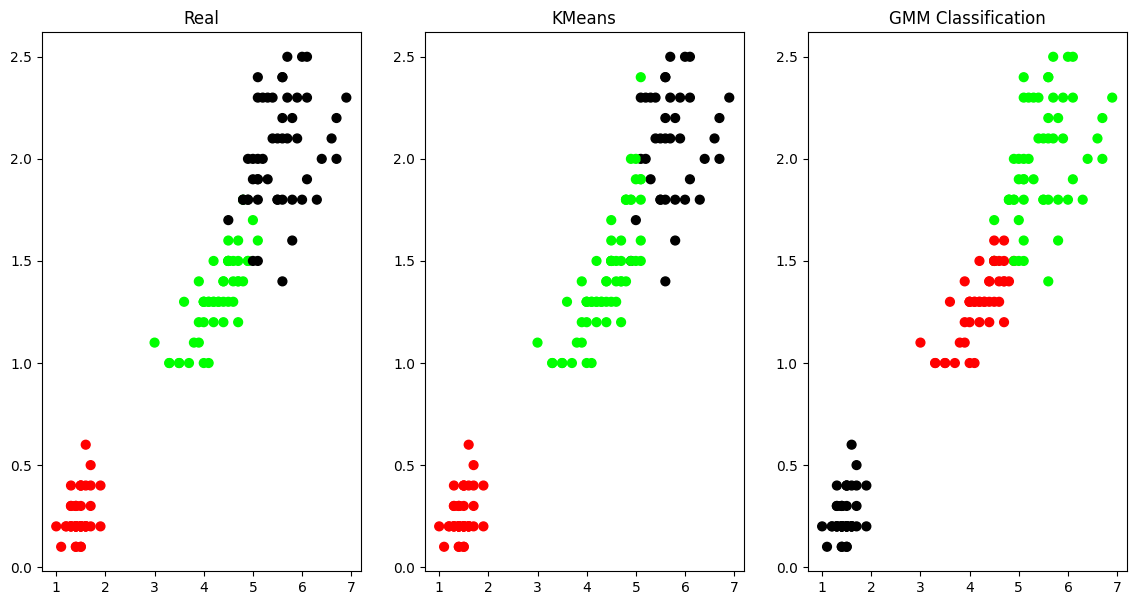

In [1]:
## Profram 7

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
import sklearn.metrics as sm
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

dataset=load_iris()

#print(dataset)
X=pd.DataFrame(dataset.data)
X.columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y=pd.DataFrame(dataset.target)
y.columns=['Targets']

#print(X)
plt.figure(figsize=(14, 7))
colormap=np.array(['red', 'lime', 'black'])

#real plot
plt.subplot(1, 3, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real')

#K-Plot
plt.subplot(1, 3, 2)
model=KMeans(n_clusters=3)
model.fit(X)
predY=np.choose(model.labels_, [0, 1, 2]).astype(np.int64)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[predY], s=40)
plt.title('KMeans')

#GMM Plot
scaler=preprocessing.StandardScaler()
scaler.fit(X)
xsa=scaler.transform(X)
xs=pd.DataFrame(xsa, columns=X.columns)
gmm=GaussianMixture(n_components=3)
gmm.fit(xs)
y_cluster_gmm=gmm.predict(xs)
plt.subplot(1, 3, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_cluster_gmm], s=40)
plt.title('GMM Classification')




In [ ]:
!pip install numpy==1.26.4

In [7]:
#Program 8

from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import datasets 
iris=datasets.load_iris() 
iris_data=iris.data 
iris_labels=iris.target 
print(iris_data) 
print(iris_labels) 
x_train, x_test, y_train, y_test=train_test_split(iris_data,iris_labels,test_size=0.30) 
classifier=KNeighborsClassifier(n_neighbors=5) 
classifier.fit(x_train,y_train) 
y_pred=classifier.predict(x_test) 
print('confusion matrix is as follows') 
print(confusion_matrix(y_test,y_pred)) 
print('Accuracy metrics') 
print(classification_report(y_test,y_pred)) 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

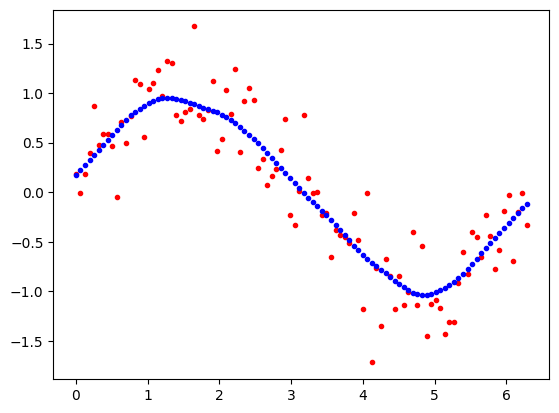

In [3]:
## Program 9

from math import ceil
import numpy as np
from scipy import linalg
def lowess(x, y, f, iterations):
    n=len(x)
    r=int(ceil(f*n))
    h=[np.sort(np.abs(x-x[i]))[r] for i in range(n)]
    w=np.clip(np.abs((x[:, None]-x[None, :])/h), 0.0, 1.0)
    w=(1-w**3)**3
    yest=np.zeros(n)
    delta=np.ones(n)
    for iteration in range(iterations):
        for i in range(n):
            weights=delta*w[:, i]
            b=np.array([np.sum(weights*y), np.sum(weights*y*x)])
            A=np.array([[np.sum(weights), np.sum(weights*x)], [np.sum(weights*x), np.sum(weights*x*x)]])
            beta=linalg.solve(A, b)
            yest[i]=beta[0]+beta[1]*x[i]
        residuals=y-yest
        s=np.median(np.abs(residuals))
        delta=np.clip(residuals/(6.0*s), -1, 1)
        delta=(1-delta**2)**2
    return yest

import math
n=100
x=np.linspace(0, 2*math.pi, n)
y=np.sin(x)+0.3*np.random.randn(n)
f=0.25
iterations=3
yest=lowess(x, y, f, iterations)

import matplotlib.pyplot as plt
plt.plot(x, y, "r.")
plt.plot(x, yest, "b.")

    

In [26]:
##Program 10


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('Social_Network_Ads.csv')
df.head()


# Preprocess the data
df.drop('User ID', axis=1, inplace=True)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Define features and target variable
y = df['Purchased'].values
X = df.drop('Purchased', axis=1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

from sklearn.svm import SVC
classifier=SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
y_pred

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
from sklearn.svm import SVC
classifier=SVC(kernel='rbf', gamma=15, C=7, random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
y_pred

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
from sklearn.svm import SVC
classifier=SVC(kernel='poly', degree=4)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
y_pred

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.84